<style>
th {
background-color:#55FF33;
}
td {
background-color:#00FFFF;
}
</style>

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


**(1) What is the independent variable? What is the dependent variable?**

**Independent variable:** congruency of the colour and text
<br/> **Dependent variable:** Duration (time) to recognise the colours or the texts

**(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.**

I can calculate the mean of test under congruent and incongruent conditions so I've chosen the dependent t-test.
<br/>The dependent t-test  compares the means of two related groups to determine whether there is a statistically significant difference between these means..<a href='#refernce1'>[1]</a><br/>

***μC***:The population's mean of congruent reaction time.<br/>
***μI***: The population's mean of incongruent reaction time. <br/>

**An appropriate set of hypotheses**

<table> 
<tr><th>Null Hypothesis</th>  <th>Alternative Hypothesis</th></tr>
<tr><td>The population mean of the congruent (μC) equals the hypothesized mean of the incongruent (μI). </td>
<td>The population mean of the congruent (μC) does not equal the hypothesized mean of the incongruent (μI).</td>   
</tr>

</table>



**The mathematical representations of the null and alternative hypotheses are defined below:<br/>**

**H0**: μC = μI<br/>
**H1**: μC ≠ μI   <br/>



**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.display import HTML
from urllib.request import urlopen
%matplotlib inline
import matplotlib.pyplot as plt 
HTML("<style>table {font-family: arial, sans-serif;  border-collapse: collapse;}td, th {border: 1px solid #dddddd; text-align: centre;padding: 8px;}tr:nth-child(even) {background-color: #dddddd;}</style>")

In [2]:
df= pd.read_csv('stroopdata.csv')

In [3]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**The mean of congruent sample μC is:** 14.05<br/>
**The mean of incongruent sample μI is:** 22.01

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

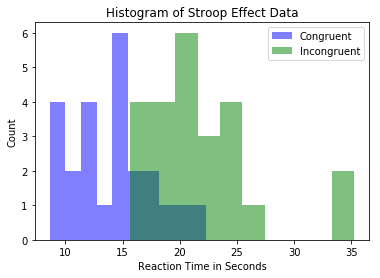

In [6]:
plt.hist(df['Congruent'],color='blue',alpha=0.5,label='Congruent')
plt.hist(df['Incongruent'],color='green',alpha=0.5,label='Incongruent')
plt.legend(loc='upper right')
plt.title('Histogram of Stroop Effect Data')
plt.ylabel('Count')
plt.xlabel('Reaction Time in Seconds')
plt.show()

From the histogram above the participants took longer time to compelete incongruent test more than congruent test.<br/>
Reaction time of incongruent tasks is right skewed with some outliers.


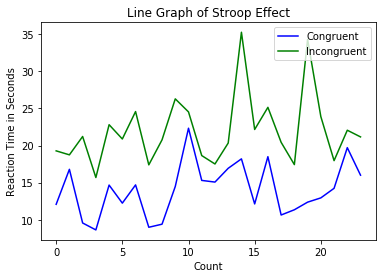

In [7]:
plt.plot(df['Congruent'],color='blue',label='Congruent')
plt.plot(df['Incongruent'],color='green',label='Incongruent')
plt.legend(loc='upper right')
plt.title('Line Graph of Stroop Effect')
plt.ylabel('Reaction Time in Seconds')
plt.xlabel('Count')
plt.show()

The graph above visualize the time spent by participants to respond in congruent and incongruent tests, congruent time line almost does not exceed 20 seconds while congruent time line almost more than 20 to 35.
    

**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  **Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.**

In [8]:
# Calculate the mean 
c_mean, Inc_mean = df['Congruent'].mean(), df['Incongruent'].mean()

# Calculate the difference of means
diff_mean= c_mean - Inc_mean

# Calculate the standard deviation of differences
std= (df['Incongruent'] - df['Congruent']).std()

# calculate the t statistic
t_stat = diff_mean/(std/(df.shape[0]**(.5)))

# degrees of freedom (number of observations -1) 
dg_f =len(df) - 1

# calculate the critical value
alpha = 0.05
cv = stats.t.ppf( alpha, dg_f)

# calculate the p-value
p = 2*(stats.t.cdf(t_stat, dg_f))

print('t-statistic= {}'.format(t_stat))

print('Degrees of freedom= {}'.format(dg_f))
print('Alpha α= {}'.format(alpha))
print('The critical value= {} , {}'.format(cv,-cv))
print('The p-value= {}'.format(p))

t-statistic= -8.020706944109957
Degrees of freedom= 23
Alpha α= 0.05
The critical value= -1.7138715277470478 , 1.7138715277470478
The p-value= 4.103000585711178e-08


**If p-value ≤ α then reject the null hypotheses H0, there is a significant difference between the means of samples.** 


<b/>
Our p-value= 1.4.103000585711178e-08- and α= .05 so we will reject the null hypotheses H0 with 95% confidence level


<h2>References:</h2>
<a id='refernce1' href='https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php'>Dependent t-test</a>
<br/>
<a id='refernce3' href="https://stats.stackexchange.com/a/271274">Using SciPy T.ppf to get p-value
</a>